In [2]:
import pandas as pd
import numpy as np
import tqdm

In [3]:
data = pd.read_csv("../biobank/ukb672220.csv", nrows=1)

In [4]:
cols = [col for col in data.columns if "6152" in col]
cols

['6152-0.0',
 '6152-0.1',
 '6152-0.2',
 '6152-0.3',
 '6152-0.4',
 '6152-1.0',
 '6152-1.1',
 '6152-1.2',
 '6152-1.3',
 '6152-1.4',
 '6152-2.0',
 '6152-2.1',
 '6152-2.2',
 '6152-2.3',
 '6152-2.4',
 '6152-3.0',
 '6152-3.1',
 '6152-3.2',
 '6152-3.3',
 '6152-3.4']

In [4]:
def blocks(files, size=65536):
    while True:
        b = files.read(size)
        if not b: break
        yield b
chunk_size = 2000
data = pd.read_csv("../biobank/ukb672220.csv", chunksize=chunk_size,low_memory=False)
""" with open("../biobank/ukb672220.csv", 'r') as f:
    rows_in_file = sum(bl.count('\n') for bl in blocks(f))"""
rows_in_file=502371
chunk_count = rows_in_file//chunk_size + int(rows_in_file%chunk_size!=0)
print("number of rows:", rows_in_file)
print("number of chunks:", chunk_count)

number of rows: 502371
number of chunks: 252


In [5]:
out_file = "instance_0_positive.csv"
res_cols =  data.get_chunk(1).columns
res = pd.DataFrame(columns=res_cols)
res.to_csv(out_file,index=False,mode='w')
max_len = 2000
for block in tqdm.tqdm(data,total=chunk_count):
    row_selection = np.sum(block[cols[:5]].to_numpy()==5,axis=-1)!=0
    res = pd.concat([res,block[row_selection]],axis=0, ignore_index=True)
    if res.shape[0] >= max_len:
        res.to_csv(out_file,mode='a',index=False,header=False)
        res = pd.DataFrame(columns=res.columns)

 59%|█████▊    | 148/252 [15:13<09:18,  5.37s/it] 

In [1]:
!wc -l instance_0_positive.csv

10126 instance_0_positive.csv


In [5]:
data = pd.read_csv("../biobank/ukb672220.csv", chunksize=chunk_size,low_memory=False)
req = 10126
out_file = "all_instance_negative.csv"
res_cols =  data.get_chunk(1).columns
res = pd.DataFrame(columns=res_cols)
res.to_csv(out_file,index=False,mode='w')
max_len = 2000
for block in tqdm.tqdm(data,total=chunk_count):
    row_selection = np.sum(block[cols].to_numpy()==5,axis=-1)==0
    block:pd.DataFrame = block[row_selection]
    res = pd.concat([res,block.sample(frac=req/rows_in_file)],axis=0, ignore_index=True)
    if res.shape[0] >= max_len:
        res.to_csv(out_file,mode='a',index=False,header=False)
        res = pd.DataFrame(columns=res.columns)

100%|██████████| 252/252 [29:32<00:00,  7.03s/it]  


In [6]:
!wc -l all_instance_negative.csv

8027 all_instance_negative.csv


In [15]:
data = pd.read_csv("../biobank/ukb672220.csv", chunksize=chunk_size,low_memory=False)
out_file = "negative_0_positive_other.csv"
res_cols =  data.get_chunk(1).columns
res = pd.DataFrame(columns=res_cols)
res.to_csv(out_file,index=False,mode='w')
max_len = 2000
for block in tqdm.tqdm(data,total=chunk_count):
    row_selection_0 = np.sum(block[cols[:5]].to_numpy()==5,axis=-1)==0
    block:pd.DataFrame = block[row_selection_0]
    row_selection_1 = np.sum(block[cols[5:]].to_numpy()==5,axis=-1)!=0
    block:pd.DataFrame = block[row_selection_1]
    res = pd.concat([res,block],axis=0, ignore_index=True)
    if res.shape[0] >= max_len:
        res.to_csv(out_file,mode='a',index=False,header=False)
        res = pd.DataFrame(columns=res.columns)

 88%|████████▊ | 89/101 [18:42<02:27, 12.29s/it]

## sort recap

at this point we constructed a dataset of 20000~ people half positive examples, half negative. </br>
we discovered there are no people that got sick after the biobank registration in instance 0

In [5]:
positive = pd.read_csv('instance_0_positive.csv',nrows=1).select_dtypes([np.int64,np.float64])
selected_cols = positive.columns

In [6]:
positive = pd.read_csv('instance_0_positive.csv',usecols=selected_cols,nrows=2000)
negative = pd.read_csv('all_instance_negative.csv',usecols=selected_cols,nrows=2000)

dataset = pd.concat([positive,negative]).sample(frac=1)
dataset.to_csv('shuffled_dataset_first_itter.csv')
print(np.unique(dataset.dtypes))

/tmp/ipykernel_264903/614115683.py:1: DtypeWarning: Columns (90,91,92,457,1231,1232,1233,1234,1235,1236,1237,1238,1239,1303,1304,1305,1306,1307,1308,1309,1310,1311,1743,1744,1745,2249,2250,2251,2252,2253,2254,2255,2256,2257,2258,2259,2260,2261,2262,2263,2264,2265,2266,2267,2268,2269,2270,2271,2272,2273,2274,2275,2276,2277,2278,2279,2280,2281,2282,2283,2284,2285,2286,2287,2288,2289,2290,2291,2292,2293,2849,2850,2851,2852,2853,2854,2855,2856,2857,2858,2859,2860,2861,2862,2863,2864,2865,2866,2867,2868,2869,2870,2871,2872,2873,2874,2875,2876,2877,2878,2879,2880,2881,2882,2883,2884,2885,2886,2887,2888,2889,2890,2891,2892,2893,3304,3305,3306,3307,3308,3309,3310,3311,3312,3313,3318,3319,3320,3321,3322,3323,3324,3325,3326,3327,3328,3337,3338,3339,3340,3341,3342,3343,3344,3345,3346,3347,3350,3351,3352,3353,3354,3355,3356,3357,3550,3551,3552,3561,3568,3569,3570,3575,3576,3577,3906,3907,3908,3912,3913,3914,3918,3919,3920,3921,3922,3924,3925,3926,3930,3931,3932,3933,3934,3936,3937,3938,3942,3943,3

[dtype('int64') dtype('float64') dtype('O')]


In [6]:
dataset = pd.read_csv('shuffled_dataset_first_itter.csv', usecols=selected_cols,nrows=2000)
features  = [col for col in selected_cols if col not in cols]
X = dataset[features].select_dtypes(include=[np.number]).fillna(0).to_numpy()
Y = np.sum(dataset[cols].to_numpy()==5,axis=-1)!=0

/tmp/ipykernel_266768/3295174849.py:1: DtypeWarning: Columns (90,91,92,457,1229,1230,1231,1232,1233,1234,1235,1236,1237,1299,1300,1301,1302,1303,1304,1305,1306,1307,1738,1739,1740,2229,2230,2231,2232,2233,2234,2235,2236,2237,2238,2239,2240,2241,2242,2243,2244,2245,2246,2247,2248,2249,2250,2251,2252,2253,2254,2255,2256,2257,2258,2259,2260,2261,2262,2263,2264,2265,2266,2267,2268,2269,2270,2271,2272,2273,2814,2815,2816,2817,2818,2819,2820,2821,2822,2823,2824,2825,2826,2827,2828,2829,2830,2831,2832,2833,2834,2835,2836,2837,2838,2839,2840,2841,2842,2843,2844,2845,2846,2847,2848,2849,2850,2851,2852,2853,2854,2855,2856,2857,2858,3270,3271,3272,3273,3274,3275,3276,3277,3278,3283,3284,3285,3286,3287,3288,3289,3290,3291,3292,3293,3301,3302,3303,3304,3305,3306,3307,3308,3309,3310,3311,3312,3315,3316,3317,3318,3319,3320,3321,3322,3515,3516,3517,3524,3525,3526,3533,3534,3535,3540,3541,3542,3871,3872,3873,3877,3878,3879,3883,3884,3885,3886,3887,3888,3889,3890,3891,3892,3893,3894,3895,3896,3897,3898,

In [7]:
from sklearn.linear_model import LogisticRegressionCV
Y = Y.astype(np.int64)
clf = LogisticRegressionCV()
clf.fit(X[:-300],Y[:-300])
clf.score(X[-300:],Y[-300:])

/home/ronenma@mta.ac.il/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/ronenma@mta.ac.il/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

0.6366666666666667

In [12]:
params = clf.get_params()


{'Cs': 10,
 'class_weight': None,
 'cv': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'l1_ratios': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'refit': True,
 'scoring': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0}

In [16]:
np.save('weights_after_first_train',clf.coef_)

### this part should allow all future runs independantly

In [1]:
import pandas as pd
import numpy as np
import tqdm

In [35]:
positive = pd.read_csv('instance_0_positive.csv',nrows=1)
fields = pd.read_csv("field_list.csv").to_numpy().flatten().tolist()
selected_cols = np.unique(np.array([col for field in fields for col in positive.columns if str(field) in col])).tolist()
y_cols = [col for col in selected_cols if "6152" in col]
x_cols = [col for col in selected_cols if "6152" not in col]
len(selected_cols), len(x_cols), len(y_cols)

(2677, 2657, 20)

In [36]:
positive = pd.read_csv('instance_0_positive.csv',usecols=selected_cols)
print("positive:", len(positive.columns))
negative = pd.read_csv('all_instance_negative.csv',usecols=selected_cols)
print("negative:",len(negative.columns))

dataset = pd.concat([positive,negative]).sample(frac=1)
dataset.to_csv('shuffled_dataset_first_itter.csv')
print(np.unique(dataset.dtypes))
del dataset, positive,negative

/tmp/ipykernel_435566/1327130551.py:1: DtypeWarning: Columns (12593,12594,12595,12596,12597,12598,12599,12600,12601,12602,12603,12604,12605,12606,12607,12608,12609,12610,12611,12612,12613,12614,12615,12616,12617,12618,12619,12620,12621,12622,12623,12624,12625,12626,13080,13081,13082,13083,13084,13085,13086,13087,13088,13089,13090,13091,13092,13093,13094,13095,13096,13097,13098,13099,13100,13101,13102,13103,13104,13105,13106,13107,13108,13109,13110,13111,13112,13113,13114,13115,13116,13117,13118,13119,13120,13121,13122,13123,13124,13125,13126,13127,13128,13129,13130,13131,13132,13133,13134,13135,13136,13137,13138,13139,13140,13141,13142,13143,13144,13145,13146,13147,13148,13149,13150,13151,13152,13153,13154,13155,13156,13157,13158,13159,13160,13161,13162,13163,13164,13165,13166,16177,16187,16197,16215,16233,16253,16263,16271,16299,16329,16335,16343,16353,16363,16373,16383,16393,16401,16411,16421,16429,16463,16473,16481,16491,16493,16495,16497,16503,16505,16507,16513,16515,16517,16523,16

positive: 2677


/tmp/ipykernel_435566/1327130551.py:3: DtypeWarning: Columns (12587,12588,12589,12590,12591,12592,12593,12594,12595,12596,12597,12598,12599,12600,12601,12602,12603,12604,12605,12606,12607,12608,12609,12610,12611,12612,12613,12614,12615,12616,12617,12618,12619,12620,12621,12622,13072,13073,13074,13075,13076,13077,13078,13079,13080,13081,13082,13083,13084,13085,13086,13087,13088,13089,13090,13091,13092,13093,13094,13095,13096,13097,13098,13099,13100,13101,13102,13103,13104,13105,13106,13107,13108,13109,13110,13111,13112,13113,13114,13115,13116,13117,13118,13119,13120,13121,13122,13123,13124,13125,13126,14085,16177,16187,16215,16233,16271,16299,16319,16329,16335,16343,16353,16363,16373,16383,16393,16401,16411,16421,16429,16473,16481,16491,16493,16495,16497,16503,16505,16507,16513,16515,16517,16523,16525,16527,16533,16535,16537,16547,16553,16555,16557,16561,16563,16565,16571,16573,16575,16581,16583,16591,16593,16595,16601,16603,16605,16613,16615,16629,16633,16641,16643,16651,16653,16659,16

negative: 2677
[dtype('float64') dtype('O')]


In [2]:
!head -1 shuffled_dataset_first_itter.csv | sed 's/[^,]//g' | wc -c

2678


In [3]:
dataset = pd.read_csv('shuffled_dataset_first_itter.csv',nrows=1).select_dtypes([np.number])
y_cols = [col for col in dataset.columns if "6152" in col]
x_cols = [col for col in dataset.columns if "6152" not in col]
print(len(x_cols),",", len(y_cols), ",", len(dataset.columns))

2647 , 20 , 2667


In [4]:
dataset = pd.read_csv('shuffled_dataset_first_itter.csv', usecols=x_cols)
X = dataset.select_dtypes([np.number]).fillna(0).to_numpy()
x_cols = dataset.select_dtypes([np.number]).columns
dataset = pd.read_csv('shuffled_dataset_first_itter.csv', usecols=y_cols)
Y = np.sum(dataset[y_cols].to_numpy()==5,axis=-1)!=0
len(x_cols), X.shape, Y.shape

/tmp/ipykernel_435791/440360472.py:1: DtypeWarning: Columns (2294,2295,2296,2297,2298,2299,2300,2301,2302,2303,2304,2305,2306,2307,2308,2309,2310,2311,2312,2313,2314,2315,2316,2317,2318,2319,2320,2321,2361,2362,2363,2364,2365,2366,2367,2368,2369,2370,2371,2372,2373,2374,2375,2376,2377,2378,2379,2380,2381,2382,2383,2384,2385,2386,2387,2388,2389,2390,2391,2392,2393,2394,2395,2396,2397,2398,2399,2400,2401,2402,2403,2404,2405,2406,2407,2408,2409,2410,2411,2412,2413,2414,2415,2416,2417,2418,2419,2420,2421,2422,2423,2424,2425,2426,2427,2428,2429,2430,2431,2432,2433,2434,2435,2457,2466,2468,2470,2474,2478,2482,2484,2486,2491,2495,2497,2499,2503,2505,2507,2511,2513,2515,2517,2519,2524,2525,2526,2527,2530,2532,2533,2535,2537,2538,2540,2542,2543,2545,2548,2550,2552,2553,2557,2558,2560,2562,2563,2565,2568,2570,2573,2578,2580,2582,2583,2585,2587,2588,2590,2592,2594,2595,2597,2599,2600,2604,2607,2609,2612,2615,2617,2619,2620,2624,2625,2627,2630,2632,2633,2635,2638,2642,2643,2645,2647,2648,2650,2652

(2396, (20129, 2396), (20129,))

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import normalize
X = normalize(X)
Y = Y.astype(np.int64)
clf = LogisticRegression(penalty='l1',solver='saga',max_iter=1000)
train_limit = X.shape[0]*7//10
clf.fit(X[:train_limit],Y[:train_limit])
clf.score(X[train_limit:],Y[train_limit:])

0.6524258983275377

In [6]:
np.save("weights.npy",clf.coef_)

In [7]:
len(x_cols), clf.coef_[0]

(2396,
 array([0.51605304, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]))

Text(0, 0.5, 'field')

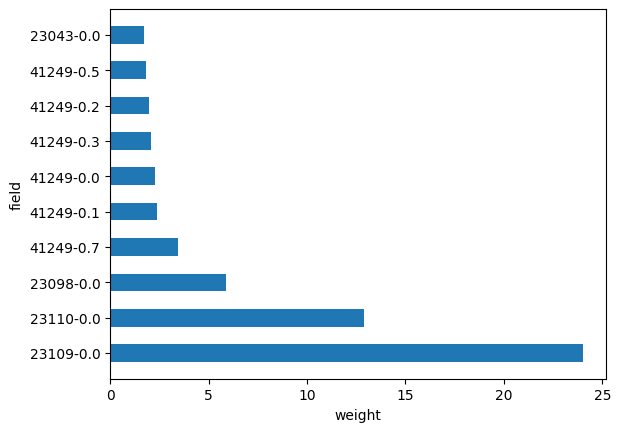

In [8]:
from matplotlib import pyplot as plt

data = sorted(zip(x_cols, clf.coef_[0]),key=lambda x: x[1],reverse=True)
sorted_x_cols = [x[0] for x in data]
weights = [x[1] for x in data]
plt.barh(sorted_x_cols[:10],weights[:10],height=0.5)
plt.xlabel("weight")
plt.ylabel("field")

### at this point there is a quick code to handle creting field schema tables with their type, that are only of four types: 
1. Integer
2. Categorial (single choise)
3. Categorial (Multiple choise)
4. real numbers

We can create a simple data cleaning procedure for each type and apply it according to the table

In [2]:
import pandas as pd
import numpy as np
import tqdm

In [2]:
def real(column):
    # usually we wan't to keep it the same 
    # but might want to normallize it 
    return column.fillna(0)

In [3]:
def cat_single(df:pd.DataFrame):
    # this makes categorial data become numerical
    # codes of each category
    df = df.fillna("<empty>").astype('str')
    all_categories = sorted(np.unique(df.to_numpy()))

    for col in df.columns:
        df[col] = pd.Categorical(
            df[col], 
            categories=all_categories
        ).codes
    return df

In [4]:
import pandas as pd

df = pd.DataFrame({'t1': ['cat', None, 'bird', 'cat'],
                   't2': ['dog', 'bird', 'cat', 'dog'],
                   't3': ['bird', 'cat', 'dog', 'bird'],
                   't4': ['cat', 'dog', 'bird', 'bird']})
cat_single(df)

,t1,t2,t3,t4
0,2,3,1,2
1,0,1,2,3
2,1,2,3,1
3,2,3,1,1


In [5]:
import pandas as pd

df = pd.DataFrame({'t1': [1,2,None,4],
                   't2': [2.,4.,3.,2.],
                   't3': [None,2,1,3],
                   't4': [2.,2.,2.,2.]})
print(df.dtypes)
df = cat_single(df)
print(df)
print(df.dtypes)

t1    float64
t2    float64
t3    float64
t4    float64
dtype: object
   t1  t2  t3  t4
0   0   1   4   1
1   1   3   1   1
2   4   2   0   1
3   3   1   2   1
t1    int8
t2    int8
t3    int8
t4    int8
dtype: object


In [6]:
def cat_multiple(df:pd.DataFrame):
    # for now we'll do the same
    df = df.fillna("<empty>").astype('str')
    all_categories = sorted(np.unique(df.to_numpy()))

    for col in df.columns:
        df[col] = pd.Categorical(
            df[col], 
            categories=all_categories
        ).codes
    return df

In [7]:
def Integer(s):
    # for now an integer is fine
    return s.fillna(0).astype(np.int64)

In [8]:
type_func_dict = {
    "Integer":Integer,
    "Categorical (single)":cat_single,
    "Categorical (multiple)":cat_multiple,
    "Continuous":real
}

In [38]:
positive = pd.read_csv('instance_0_positive.csv',nrows=1)
fields = pd.read_csv(
    "field_list.csv",
    dtype={
        "field_id":pd.Int64Dtype(),
        "value_type":pd.StringDtype()
    }
    ).to_numpy()

field_names = fields[:,0].astype(np.int64)
field_types = fields[:,1].astype(str)

In [39]:
len(field_names)

947

In [42]:
selected_cols = []
for field in field_names:
    for col in positive.columns:
        if col.startswith(str(field) + "-"):
            selected_cols.append(col)

In [43]:
len(selected_cols)

6615

In [44]:
positive = pd.read_csv('instance_0_positive.csv',usecols=selected_cols,chunksize=1000,low_memory=False)
negative = pd.read_csv('all_instance_negative.csv',usecols=selected_cols,chunksize=1000,low_memory=False)

cols = positive.get_chunk(0).columns
print(len(cols))
s_chunk = pd.DataFrame(columns=cols)
s_chunk.to_csv('shuffled_dataset_first_itter.csv',index=False,mode='w')
for p_chunk, n_chunk in tqdm.tqdm(zip(positive,negative), total=11):
    s_chunk = pd.concat([p_chunk,n_chunk]).sample(frac=1)
    s_chunk[cols].to_csv('shuffled_dataset_first_itter.csv',mode='a',header=False,index=False)
    

dataset = pd.read_csv('shuffled_dataset_first_itter.csv',nrows=10)
print(np.unique(dataset.dtypes))
del dataset, positive,negative, p_chunk, s_chunk, n_chunk

6615


100%|██████████| 11/11 [01:17<00:00,  7.01s/it]


[dtype('float64') dtype('O')]


In [45]:
!head -1 shuffled_dataset_first_itter.csv | sed 's/[^,]//g' | wc -c

2638.06s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


6615


In [47]:
dataset = pd.read_csv('shuffled_dataset_first_itter.csv', chunksize=2000, low_memory=False)

cols = dataset.get_chunk(0).columns
s_chunk = pd.DataFrame(columns=cols)
s_chunk.to_csv('shuffled_dataset_clean.csv',index=False,mode='w')

field_groups = {}
for f, t in tqdm.tqdm(zip(field_names,field_types), total=len(field_names)):
        res = []
        f = str(f)+"-"
        for col in cols:
            if col.startswith(f):
                res.append(col)
        field_groups[f] = (res,type_func_dict[t])

print("done with type matching")


for i,chunk in enumerate(dataset):
    for field, (res,clean_func) in tqdm.tqdm(field_groups.items(),desc=f"chunk {i+1}/11"):
        if clean_func in [cat_single, cat_multiple]:
            for col in res:
                if chunk[col].dtype == int:
                    chunk[col] = chunk[col].astype(float)
        chunk[res] = clean_func(chunk[res])
    chunk[cols].to_csv('shuffled_dataset_clean.csv',mode='a',header=False,index=False)


print(np.unique(chunk.dtypes))

100%|██████████| 947/947 [00:01<00:00, 764.93it/s]


done with type matching


chunk 11/11: 100%|██████████| 947/947 [00:05<00:00, 188.35it/s]


[dtype('int8') dtype('int16') dtype('int64') dtype('float64')]


In [3]:
dataset = pd.read_csv('shuffled_dataset_clean.csv', nrows=1, low_memory=False)
np.unique(dataset.dtypes)

array([dtype('int64'), dtype('float64')], dtype=object)

In [1]:
import pandas as pd
import numpy as np
import tqdm
dataset = pd.read_csv('shuffled_dataset_clean.csv', nrows=1)
y_cols = [col for col in dataset.columns if col.startswith("6152-")]
x_cols = [col for col in dataset.columns if not col.startswith("6152-")]
print(len(x_cols),",", len(y_cols), ",", len(dataset.columns))

6595 , 20 , 6615


In [2]:
dataset = pd.read_csv('shuffled_dataset_clean.csv', usecols=x_cols)
X = dataset.to_numpy()
x_cols = dataset.select_dtypes([np.number]).columns
dataset = pd.read_csv('shuffled_dataset_clean.csv', usecols=y_cols)
Y = np.sum(dataset[y_cols].to_numpy()==5,axis=-1)!=0
len(x_cols), X.shape, Y.shape

(6595, (20129, 6595), (20129,))

In [3]:
del dataset

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import normalize
X = normalize(X)
Y = Y.astype(np.int64)
clf = LogisticRegression(penalty='l1',solver='liblinear',max_iter=200,verbose=True)
train_limit = X.shape[0]*7//10
clf.fit(X[:train_limit],Y[:train_limit])
test_score = clf.score(X[train_limit:],Y[train_limit:])
train_score = clf.score(X[:train_limit],Y[:train_limit])
print(train_score, test_score)

[LibLinear]iter   1  #CD cycles 1
iter   2  #CD cycles 1
iter   3  #CD cycles 1
iter   4  #CD cycles 1
iter   5  #CD cycles 1
iter   6  #CD cycles 3
iter   7  #CD cycles 1
iter   8  #CD cycles 49
iter   9  #CD cycles 5
iter  10  #CD cycles 1
iter  11  #CD cycles 72
iter  12  #CD cycles 19
iter  13  #CD cycles 1
iter  14  #CD cycles 48
iter  15  #CD cycles 18
iter  16  #CD cycles 4
optimization finished, #iter = 16
Objective value = 4330.233146
#nonzeros/#features = 41/6596
0.9240596167494677 0.9201854611690677


In [5]:
np.save("weights.npy",clf.coef_)

In [6]:
clf.coef_.shape

(1, 6595)

/tmp/ipykernel_529050/653109934.py:6: RuntimeWarning: divide by zero encountered in log
  plt.barh(sorted_x_cols[:41],np.log(weights[:41],where=weights[:41]!=0),height=0.5)


Text(0, 0.5, 'field')

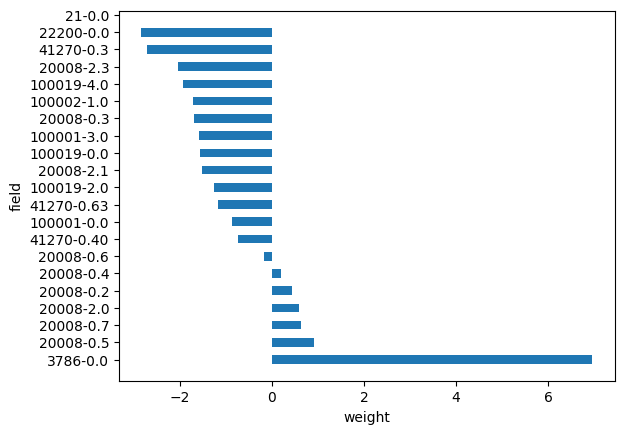

In [10]:
from matplotlib import pyplot as plt

data = sorted(zip(x_cols, clf.coef_[0]),key=lambda x: x[1],reverse=True)
sorted_x_cols = [x[0] for x in data]
weights = [x[1] for x in data]
plt.barh(sorted_x_cols[:41],np.log(weights[:41],where=weights[:41]!=0),height=0.5)
plt.xlabel("weight")
plt.ylabel("field")

In [1]:
import experiment

clf, x_cols = experiment.experiment("first_exp", True)
experiment.plot_fields(x_cols, clf.coef_[0], 40)

6615


100%|██████████| 947/947 [00:58<00:00, 16.30it/s]


done with type matching


chunk 1/1: 100%|██████████| 946/946 [01:26<00:00, 10.93it/s]


[dtype('int8') dtype('int16') dtype('int64') dtype('float64')]
[LibLinear]iter   1  #CD cycles 1
iter   2  #CD cycles 1
iter   3  #CD cycles 1
iter   4  #CD cycles 1
iter   5  #CD cycles 6
iter   6  #CD cycles 5
iter   7  #CD cycles 2
iter   8  #CD cycles 1
iter   9  #CD cycles 43
iter  10  #CD cycles 19
iter  11  #CD cycles 4
iter  12  #CD cycles 1
iter  13  #CD cycles 204
iter  14  #CD cycles 107
iter  15  #CD cycles 37
iter  16  #CD cycles 1
iter  17  #CD cycles 1000
iter  18  #CD cycles 581
iter  19  #CD cycles 166
iter  20  #CD cycles 28
optimization finished, #iter = 20
Objective value = 506.223743
#nonzeros/#features = 2096/6596
0.9910574875798439 0.9375724457691671


ValueError: too many values to unpack (expected 2)

#### this code is just to save the result dispite the bug

In [8]:
with open("res.txt") as f_in:
    s = f_in.read()
print(s)

b'\x80\x04\x95\xcd\xd0\x00\x00\x00\x00\x00\x00\x8c\x1esklearn.linear_model._logistic\x94\x8c\x12LogisticRegression\x94\x93\x94)\x81\x94}\x94(\x8c\x07penalty\x94\x8c\x02l1\x94\x8c\x04dual\x94\x89\x8c\x03tol\x94G?\x1a6\xe2\xeb\x1cC-\x8c\x01C\x94G?\xf0\x00\x00\x00\x00\x00\x00\x8c\rfit_intercept\x94\x88\x8c\x11intercept_scaling\x94K\x01\x8c\x0cclass_weight\x94N\x8c\x0crandom_state\x94N\x8c\x06solver\x94\x8c\tliblinear\x94\x8c\x08max_iter\x94K\xc8\x8c\x0bmulti_class\x94\x8c\x04auto\x94\x8c\x07verbose\x94\x88\x8c\nwarm_start\x94\x89\x8c\x06n_jobs\x94N\x8c\x08l1_ratio\x94N\x8c\x0en_features_in_\x94M\xc3\x19\x8c\x08classes_\x94\x8c\x15numpy.core.multiarray\x94\x8c\x0c_reconstruct\x94\x93\x94\x8c\x05numpy\x94\x8c\x07ndarray\x94\x93\x94K\x00\x85\x94C\x01b\x94\x87\x94R\x94(K\x01K\x02\x85\x94h\x1c\x8c\x05dtype\x94\x93\x94\x8c\x02b1\x94\x89\x88\x87\x94R\x94(K\x03\x8c\x01|\x94NNNJ\xff\xff\xff\xffJ\xff\xff\xff\xffK\x00t\x94b\x89C\x02\x00\x01\x94t\x94b\x8c\x05coef_\x94h\x1bh\x1eK\x00\x85\x94h \x87\x94

In [9]:
import ast
with open('first_exp.pkl','wb') as f_out: 
    f_out.write(ast.literal_eval(s))

In [3]:
from experiment import load_data
X, Y, x_cols = load_data('first_exp')

0.9910574875798439 0.9375724457691671


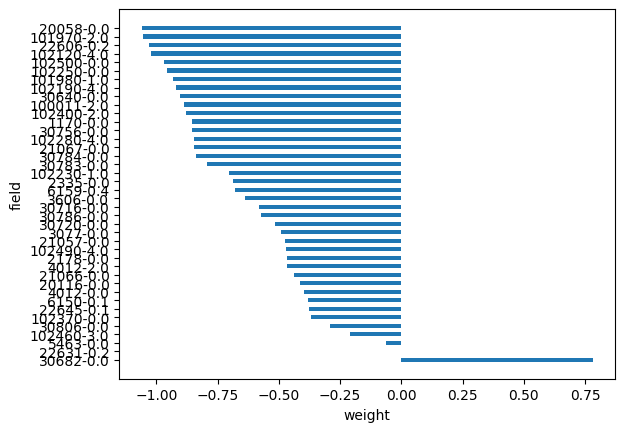

In [4]:
from experiment import plot_fields
import pickle
with open('first_exp.pkl','rb') as f_in:
    clf = pickle.loads(f_in.read())
train_limit = X.shape[0]*7//10
test_score = clf.score(X[train_limit:],Y[train_limit:])
train_score = clf.score(X[:train_limit],Y[:train_limit])
print(train_score, test_score)
plot_fields(x_cols,clf.coef_[0],40)

In [5]:
'4012-0.0' in x_cols

True

age of DVT diagnosis is given in X. Let's remove it and try again 

[LibLinear]iter   1  #CD cycles 1
iter   2  #CD cycles 1
iter   3  #CD cycles 1
iter   4  #CD cycles 2
iter   5  #CD cycles 1
iter   6  #CD cycles 22
iter   7  #CD cycles 6
iter   8  #CD cycles 2
iter   9  #CD cycles 2
iter  10  #CD cycles 1
iter  11  #CD cycles 117
iter  12  #CD cycles 37
iter  13  #CD cycles 11
iter  14  #CD cycles 1
iter  15  #CD cycles 994
iter  16  #CD cycles 331
iter  17  #CD cycles 30
iter  18  #CD cycles 1
iter  19  #CD cycles 1000
iter  20  #CD cycles 1000
iter  21  #CD cycles 1000
iter  22  #CD cycles 1000
iter  23  #CD cycles 1000
iter  24  #CD cycles 1000
iter  25  #CD cycles 1000
iter  26  #CD cycles 511
optimization finished, #iter = 26
Objective value = 3002.269190
#nonzeros/#features = 2789/6592
0.9335699077359829 0.8478224871667495


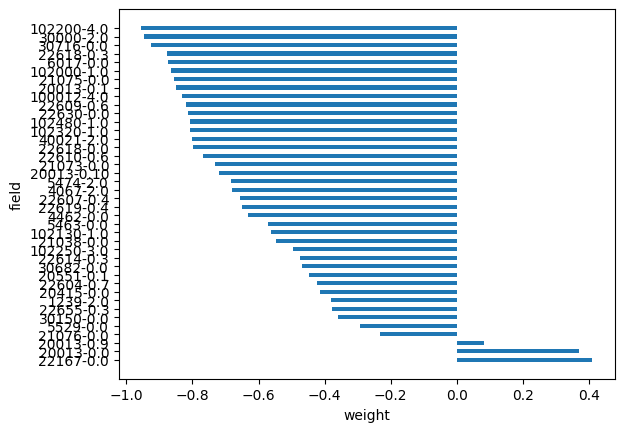

In [2]:
import experiment

clf, x_cols = experiment.experiment("second_exp", False)
experiment.plot_fields(x_cols, clf.coef_[0], 40)

### Let's go over the fields:
1. 22167-x.x - if a patient recently took astma medication
2. 20013-x.x - method patient reported time of diagnose of a disease. this seems like something to remove.
3. 21076-x.x - If IBS was diagnosed, this field indicates Vomiting when IBS symptoms first began
4. 5529-x.x - Surgery on leg arteries (other than for varicose veins)
5. 30150-x.x - Eosinophill count
6. 22655-x.x - Rest days during night shift periods
7. 1239-x.x - Current tobacco smoking
8. 20415-x.x - Ongoing addiction to alcohol
9. 22604-x.x - Work hours - lumped category
10. 20551-x.x - Substance of prescription or over-the-counter medication addiction

---
We'll remove 20013 from the field list and run another expirement. plus the weight scale is changed from log(weight) to log(1+|weight|)
We'll also remove all fields relating to later instances

3548


100%|██████████| 945/945 [00:00<00:00, 1807.55it/s]


done with type matching


chunk 1/1: 100%|██████████| 944/944 [00:44<00:00, 21.25it/s] 


[dtype('int8') dtype('int16') dtype('int64') dtype('float64')]
[LibLinear]iter   1  #CD cycles 1
iter   2  #CD cycles 1
iter   3  #CD cycles 1
iter   4  #CD cycles 2
iter   5  #CD cycles 1
iter   6  #CD cycles 17
iter   7  #CD cycles 5
iter   8  #CD cycles 1
iter   9  #CD cycles 82
iter  10  #CD cycles 22
iter  11  #CD cycles 1
iter  12  #CD cycles 659
iter  13  #CD cycles 101
iter  14  #CD cycles 35
iter  15  #CD cycles 5
iter  16  #CD cycles 6
iter  17  #CD cycles 22
iter  18  #CD cycles 5
iter  19  #CD cycles 1
iter  20  #CD cycles 1000
iter  21  #CD cycles 1000
iter  22  #CD cycles 1000
iter  23  #CD cycles 1000
iter  24  #CD cycles 538
optimization finished, #iter = 24
Objective value = 3477.515777
#nonzeros/#features = 1766/3544
0.9139815471965933 0.8614008941877794


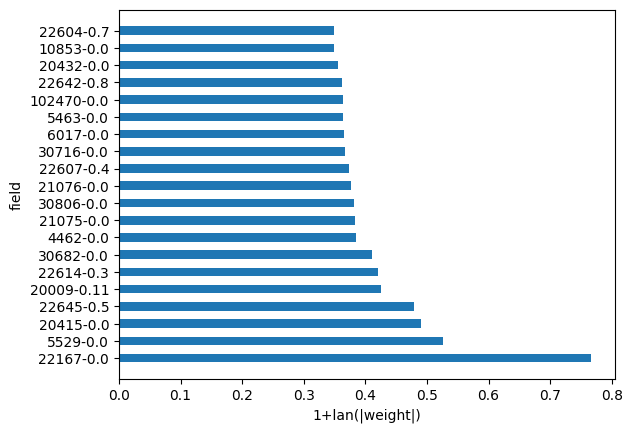

In [1]:
import experiment

clf, x_cols = experiment.experiment("third_exp", True)
experiment.plot_fields(x_cols, clf.coef_[0], 20)

<style>
    mark {
        background-color: lightgreen;
        color: black;
    }
</style>
1. <mark>22167-x.x - if a patient recently took astma medication</mark>
2. <mark>5529-x.x - Surgery on leg arteries (other than for varicose veins)</mark>
3. <mark>20415-x.x - Ongoing addiction to alcohol </mark>
4. 22645-x.x - Rest days during mixed shift periods
5. 20009-x.x - Interpolated Age of participant when non-cancer illness first diagnosed - i think this is noise
6. <mark>22614-x.x - Worked with pesticides </mark>
7. 30682-x.x - Calcium aliquot
8. <mark> 4462-x.x - Average monthly intake of other alcoholic drinks </mark>
9. <mark> 21075-x.x - Bloody diarrhoea when IBS symptoms first began </mark>
10. 30806-x.x - Oestradiol reportability
11. <mark>21076-x.x - If IBS was diagnosed, this field indicates Vomiting when IBS symptoms first began </mark>

In <mark>green</mark> are repeating fields from previous experiment

restart experiment without 30682 and 20009

3513


100%|██████████| 943/943 [00:00<00:00, 1842.59it/s]


done with type matching


chunk 1/1: 100%|██████████| 942/942 [00:44<00:00, 21.34it/s] 


[dtype('int8') dtype('int16') dtype('int64') dtype('float64')]
[LibLinear]iter   1  #CD cycles 1
iter   2  #CD cycles 1
iter   3  #CD cycles 1
iter   4  #CD cycles 2
iter   5  #CD cycles 1
iter   6  #CD cycles 17
iter   7  #CD cycles 4
iter   8  #CD cycles 1
iter   9  #CD cycles 84
iter  10  #CD cycles 29
iter  11  #CD cycles 1
iter  12  #CD cycles 678
iter  13  #CD cycles 134
iter  14  #CD cycles 9
iter  15  #CD cycles 22
iter  16  #CD cycles 5
iter  17  #CD cycles 1
iter  18  #CD cycles 1000
iter  19  #CD cycles 1000
iter  20  #CD cycles 1000
iter  21  #CD cycles 1000
iter  22  #CD cycles 928
iter  23  #CD cycles 94
optimization finished, #iter = 23
Objective value = 3581.101763
#nonzeros/#features = 1776/3509
0.9127750177430802 0.8544461003477397


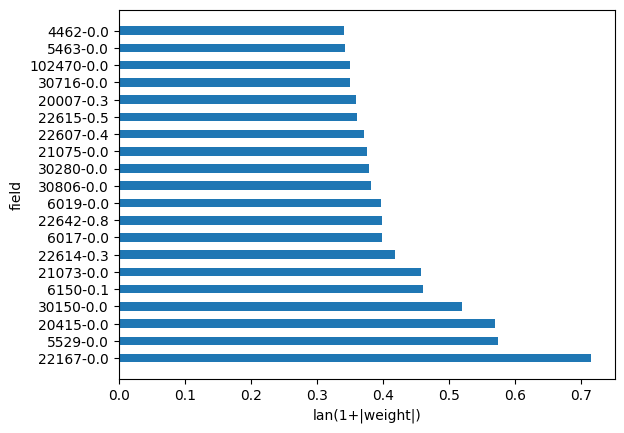

In [1]:
import experiment

clf, x_cols = experiment.experiment("forth_exp", True)
experiment.plot_fields(x_cols, clf.coef_[0], 20)